In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
# Read the JSON file into a Pandas DataFrame
df = pd.read_json('Loan_approval_dataset.json')
df.drop_duplicates()
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


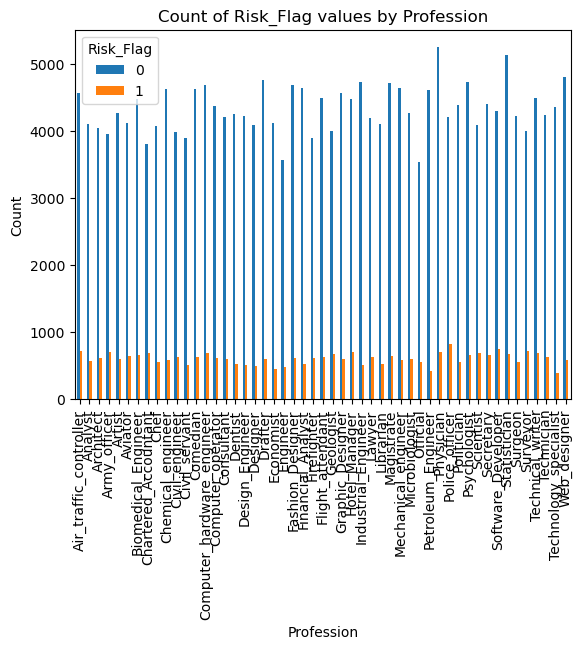

In [4]:
import matplotlib.pyplot as plt

profession_df = df.groupby('Profession')['Risk_Flag'].value_counts()

# Create a bar plot
profession_df.unstack().plot(kind='bar')
plt.title("Count of Risk_Flag values by Profession")
plt.xlabel("Profession")
plt.ylabel("Count")
plt.show()

In [6]:
df['Profession'].value_counts()

Profession
Physician                     5957
Statistician                  5806
Web_designer                  5397
Psychologist                  5390
Computer_hardware_engineer    5372
Drafter                       5359
Magistrate                    5357
Fashion_Designer              5304
Air_traffic_controller        5281
Comedian                      5259
Industrial_Engineer           5250
Mechanical_engineer           5217
Chemical_engineer             5205
Technical_writer              5195
Hotel_Manager                 5178
Financial_Analyst             5167
Graphic_Designer              5166
Flight_attendant              5128
Biomedical_Engineer           5127
Secretary                     5061
Software_Developer            5053
Petroleum_Engineer            5041
Police_officer                5035
Computer_operator             4990
Politician                    4944
Microbiologist                4881
Technician                    4864
Artist                        4861
Lawyer   

In [44]:
profession_proportion = df.groupby('Profession')['Risk_Flag'].value_counts(normalize=True)
print(profession_proportion)

Profession              Risk_Flag
Air_traffic_controller  0            0.864609
                        1            0.135391
Analyst                 0            0.878535
                        1            0.121465
Architect               0            0.868800
                                       ...   
Technician              1            0.128289
Technology_specialist   0            0.918514
                        1            0.081486
Web_designer            0            0.890865
                        1            0.109135
Name: proportion, Length: 102, dtype: float64


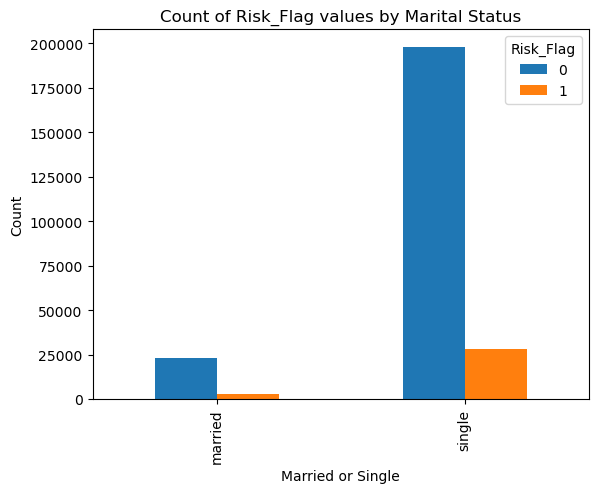

In [11]:
married_df = df.groupby('Married/Single')['Risk_Flag'].value_counts()

# Create a bar plot
married_df.unstack().plot(kind='bar')
plt.title("Count of Risk_Flag values by Marital Status")
plt.xlabel("Married or Single")
plt.ylabel("Count")
plt.show()

In [45]:
marital_proportions = df.groupby('Married/Single')['Risk_Flag'].value_counts(normalize=True)
print(marital_proportions)

Married/Single  Risk_Flag
married         0            0.897544
                1            0.102456
single          0            0.874664
                1            0.125336
Name: proportion, dtype: float64


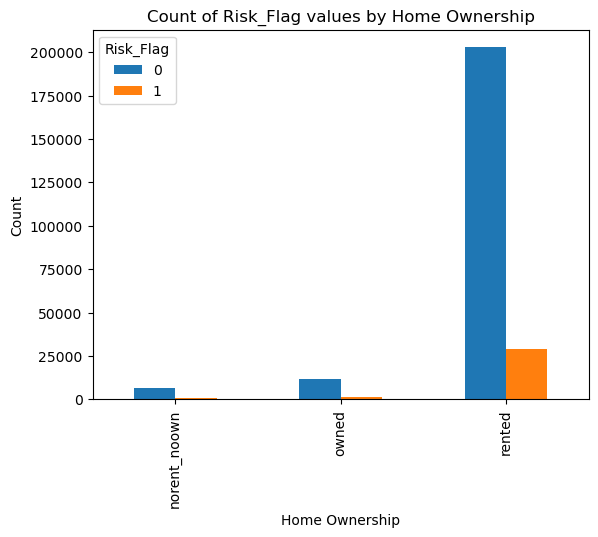

In [13]:
home_ownership_df = df.groupby('House_Ownership')['Risk_Flag'].value_counts()

# Create a bar plot
home_ownership_df.unstack().plot(kind='bar')
plt.title("Count of Risk_Flag values by Home Ownership")
plt.xlabel("Home Ownership")
plt.ylabel("Count")
plt.show()

In [46]:
home_ownership_proportions = df.groupby('House_Ownership')['Risk_Flag'].value_counts(normalize=True)
print(home_ownership_proportions)

House_Ownership  Risk_Flag
norent_noown     0            0.900473
                 1            0.099527
owned            0            0.910203
                 1            0.089797
rented           0            0.874423
                 1            0.125577
Name: proportion, dtype: float64


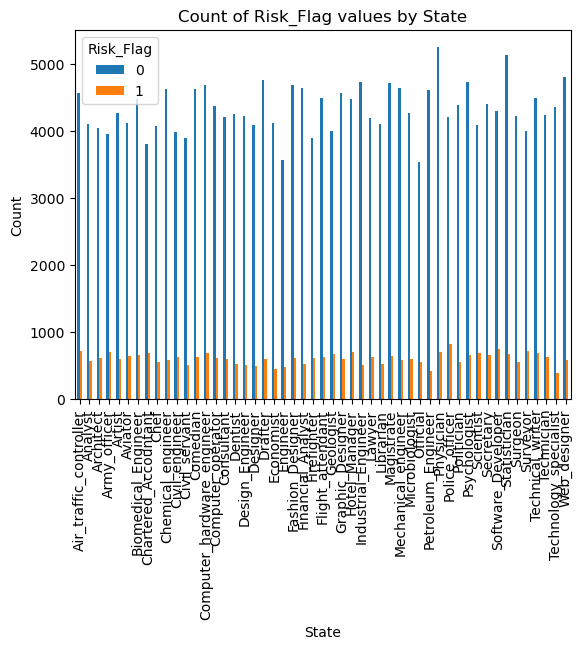

In [14]:
state_df = df.groupby('STATE')['Risk_Flag'].value_counts()

# Create a bar plot
profession_df.unstack().plot(kind='bar')
plt.title("Count of Risk_Flag values by State")
plt.xlabel("State")
plt.ylabel("Count")
plt.show()

In [47]:
state_proportions = df.groupby('STATE')['Risk_Flag'].value_counts(normalize=True)
print(state_proportions)

STATE              Risk_Flag
Andhra_Pradesh     0            0.883978
                   1            0.116022
Assam              0            0.868309
                   1            0.131691
Bihar              0            0.869414
                   1            0.130586
Chandigarh         0            0.907012
                   1            0.092988
Chhattisgarh       0            0.866719
                   1            0.133281
Delhi              0            0.895446
                   1            0.104554
Gujarat            0            0.882276
                   1            0.117724
Haryana            0            0.875792
                   1            0.124208
Himachal_Pradesh   0            0.866747
                   1            0.133253
Jammu_and_Kashmir  0            0.841011
                   1            0.158989
Jharkhand          0            0.866704
                   1            0.133296
Karnataka          0            0.899705
                   1        

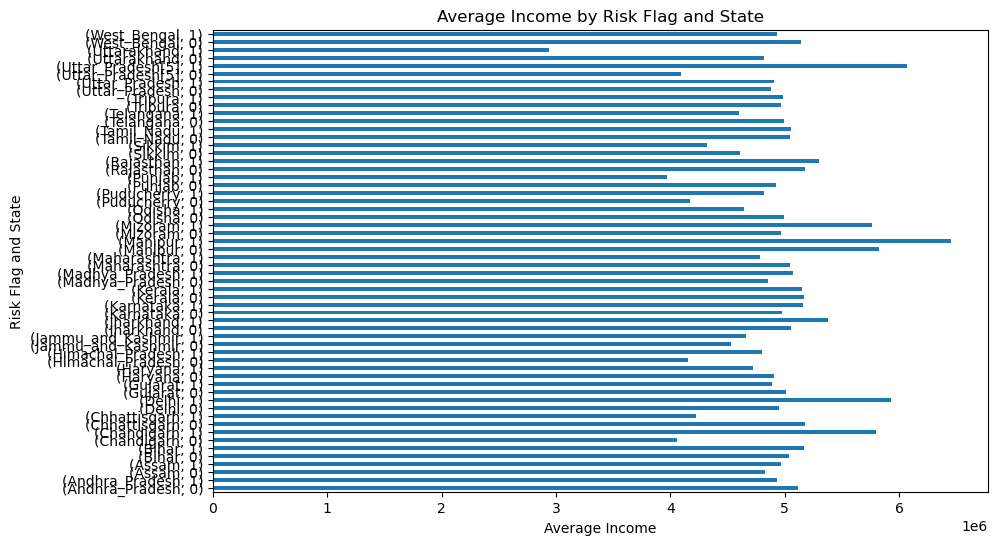

In [19]:
avg_income = df.groupby(['STATE','Risk_Flag'])['Income'].mean()

fig, ax = plt.subplots(figsize=(10, 6))

avg_income.plot.barh(ax=ax)

ax.set_xlabel('Average Income')
ax.set_ylabel('Risk Flag and State')
ax.set_title('Average Income by Risk Flag and State')

plt.show()

In [49]:
df.describe()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


In [50]:
# bin based upon income
# Define the income bins
bins = [0, 2000000, 4000000, 6000000, 8000000, 10000000]

# Bin the dataframe based on income
df['income_bin'] = pd.cut(df['Income'], bins)

# Print the binned dataframe
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,income_bin
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0,"(0, 2000000]"
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0,"(6000000, 8000000]"
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0,"(2000000, 4000000]"
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1,"(6000000, 8000000]"
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1,"(4000000, 6000000]"


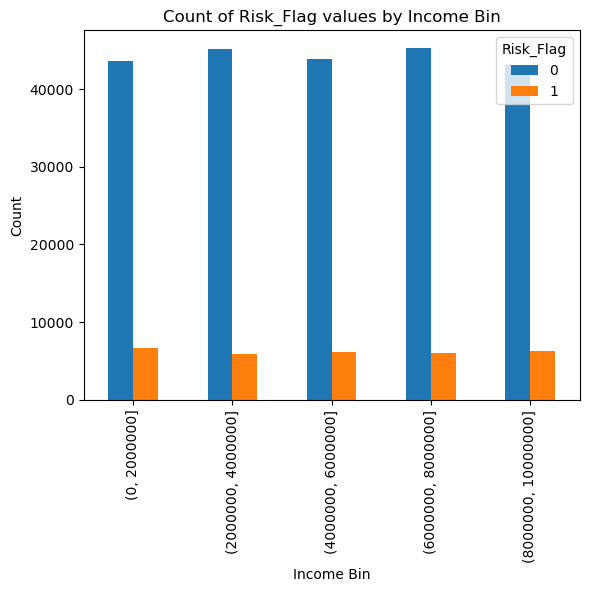

In [51]:
income_bin_df = df.groupby('income_bin')['Risk_Flag'].value_counts()

# Create a bar plot
income_bin_df.unstack().plot(kind='bar')
plt.title("Count of Risk_Flag values by Income Bin")
plt.xlabel("Income Bin")
plt.ylabel("Count")
plt.show()

In [52]:
income_bin_proportions = df.groupby('income_bin')['Risk_Flag'].value_counts(normalize=True)
print(income_bin_proportions)

income_bin           Risk_Flag
(0, 2000000]         0            0.868304
                     1            0.131696
(2000000, 4000000]   0            0.884919
                     1            0.115081
(4000000, 6000000]   0            0.876493
                     1            0.123507
(6000000, 8000000]   0            0.882086
                     1            0.117914
(8000000, 10000000]  0            0.872900
                     1            0.127100
Name: proportion, dtype: float64


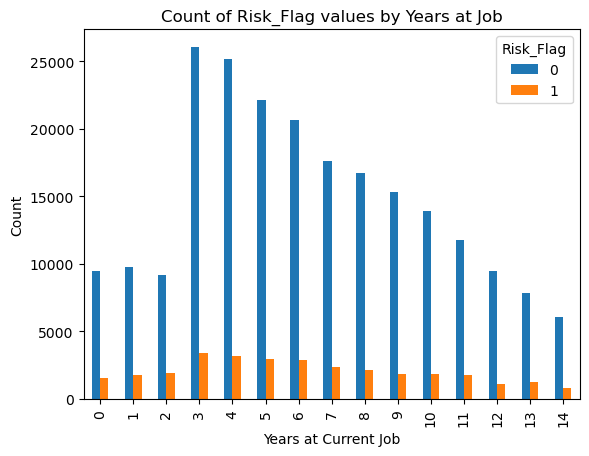

In [54]:
current_job_df = df.groupby('CURRENT_JOB_YRS')['Risk_Flag'].value_counts()

# Create a bar plot
current_job_df.unstack().plot(kind='bar')
plt.title("Count of Risk_Flag values by Years at Job")
plt.xlabel("Years at Current Job")
plt.ylabel("Count")
plt.show()

In [55]:
job_bins = [0, 2, 5, 8, 11, 14]

# Bin the dataframe based on income
df['yrs_at_job_bin'] = pd.cut(df['CURRENT_JOB_YRS'], job_bins)

# Print the binned dataframe
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,income_bin,yrs_at_job_bin
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0,"(0, 2000000]","(2, 5]"
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0,"(6000000, 8000000]","(8, 11]"
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0,"(2000000, 4000000]","(2, 5]"
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1,"(6000000, 8000000]","(0, 2]"
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1,"(4000000, 6000000]","(2, 5]"


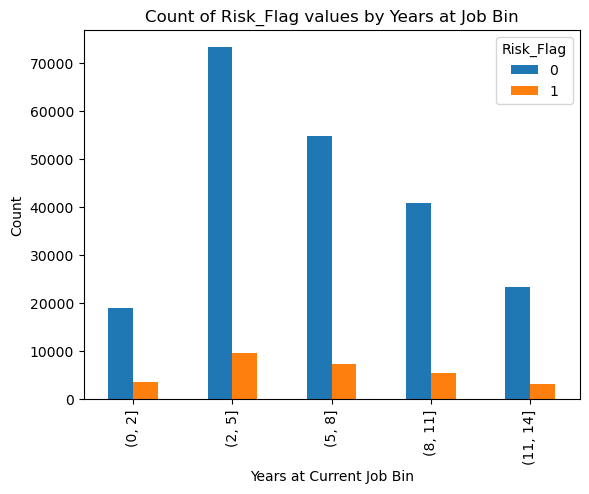

In [56]:
years_at_job_bin_df = df.groupby('yrs_at_job_bin')['Risk_Flag'].value_counts()

# Create a bar plot
years_at_job_bin_df.unstack().plot(kind='bar')
plt.title("Count of Risk_Flag values by Years at Job Bin")
plt.xlabel("Years at Current Job Bin")
plt.ylabel("Count")
plt.show()

In [57]:
years_at_job_bin_proportions = df.groupby('yrs_at_job_bin')['Risk_Flag'].value_counts(normalize=True)
years_at_job_bin_proportions

yrs_at_job_bin  Risk_Flag
(0, 2]          0            0.837084
                1            0.162916
(2, 5]          0            0.884304
                1            0.115696
(5, 8]          0            0.881265
                1            0.118735
(8, 11]         0            0.881019
                1            0.118981
(11, 14]        0            0.879639
                1            0.120361
Name: proportion, dtype: float64

Being new at your job hurts your chances of getting a loan.  But anything more than 2 years of experience at your job is not an advantage by itself.  